In [114]:
import networkx as nx
import matplotlib.pyplot as plt

In [115]:
class Molecules:
    def __init__(self, ifn):
        with open(ifn, "r") as ofn:
            lines = ofn.readlines()
            
        for ind, l in enumerate(lines):
            sp = l.split()
            if len(sp) < 1:
                continue
            if len(sp) > 1:
                if sp[1] == "atoms":
                    self.numAtom = int(sp[0])
                if sp[1] == "bonds":
                    self.bonds = int(sp[0])
                if sp[1] == "angles":
                    self.angles = int(sp[0])
                if sp[1] == "dihedrals":
                    self.dihedrals = int(sp[0])
                if sp[1] == "impropers":
                    self.impropers = int(sp[0])
                    
            if sp[0] == "Types":        
                self.InitIDs = [ [int(l.split()[0]),l.split()[1]] for l in lines[ind+2:ind+2+self.numAtom] ]

            if sp[0] == "Charges":        
                self.Charges = {int(l.split()[0]):l.split()[1] for l in lines[ind+2:ind+2+self.numAtom] }

            if sp[0] == "Coords":        
                self.Coords = {int(l.split()[0]):"\t".join(l.split()[1:]) for l in lines[ind+2:ind+2+self.numAtom] }
            
            if sp[0] == "Bonds":
                self.Bonds = [ list(map(int, l.split()[1:])) for l in lines[ind+2:ind+2+self.bonds]]
                
            if sp[0] == "Angles":
                self.Angles = [ list(map(int, l.split()[1:])) for l in lines[ind+2:ind+2+self.angles]]
                
            if sp[0] == "Dihedrals":
                self.Dihedrals = [ list(map(int, l.split()[1:])) for l in lines[ind+2:ind+2+self.dihedrals]]         
                
            if sp[0] == "Impropers":
                self.Impropers = [ list(map(int, l.split()[1:])) for l in lines[ind+2:ind+2+self.impropers]]        
    
    def Delete_atoms(self, delete_atoms):
        
        self.InitIDs = {key:val for key,val in self.InitIDs if key not in delete_atoms}
        self.old2newid = {key:ind+1 for ind,key in enumerate(self.InitIDs)}
        self.new2old = {value: key for key, value in self.old2newid.items()}
        
        self.InitIDs = {self.old2newid[key]:val for key,val in self.InitIDs.items()}
        self.Charges = {self.old2newid[key]:val for key,val in self.Charges.items() if key in self.old2newid}
        self.Coords = {self.old2newid[key]:val for key,val in self.Coords.items() if key in self.old2newid}
        
        self.Bonds = [ [l[0]] + [self.old2newid[a] for a in l[1:]] for l in self.Bonds if all(elem in self.old2newid for elem in l[1:])]
        self.Angles = [ [l[0]] + [self.old2newid[a] for a in l[1:]] for l in self.Angles if all(elem in self.old2newid for elem in l[1:])]
        self.Dihedrals = [ [l[0]] + [self.old2newid[a] for a in l[1:]] for l in self.Dihedrals if all(elem in self.old2newid for elem in l[1:])]
        self.Impropers = [ [l[0]] + [self.old2newid[a] for a in l[1:]] for l in self.Impropers if all(elem in self.old2newid for elem in l[1:])]
        
        self.numAtom = len(self.InitIDs)
        self.bonds = len(self.Bonds)
        self.angles = len(self.Angles)
        self.dihedrals = len(self.Dihedrals)
        self.impropers = len(self.Impropers)
        
    def Write_molecule(self, ifn):
        with open(ifn, "w") as ofn:
            ofn.write("delete edged atoms \n")
            ofn.write(f"{self.numAtom} atoms\n{self.bonds} bonds\n{self.angles} angles\n{self.dihedrals} dihedrals\n{self.impropers} impropers\n")
            ofn.write("\nTypes\n\n")
            ofn.write("\n".join([ "\t".join([str(k),val]) for k,val in self.InitIDs.items()]))
            ofn.write("\n\nCharges\n\n")
            ofn.write("\n".join([ "\t".join([str(k),val]) for k,val in self.Charges.items()]))
            ofn.write("\n\nCoords\n\n")
            ofn.write("\n".join([ "\t".join([str(k),val]) for k,val in self.Coords.items()]))
            ofn.write("\n\nBonds\n\n")
            ofn.write("\n".join([ "\t".join([str(ind+1)] + list(map(str, val))) for ind,val in enumerate(self.Bonds)]))
            ofn.write("\n\nAngles\n\n")
            ofn.write("\n".join([ "\t".join([str(ind+1)] + list(map(str, val))) for ind,val in enumerate(self.Angles)]))
            ofn.write("\n\nDihedrals\n\n")
            ofn.write("\n".join([ "\t".join([str(ind+1)] + list(map(str, val))) for ind,val in enumerate(self.Dihedrals)]))
            ofn.write("\n\nImpropers\n\n")
            ofn.write("\n".join([ "\t".join([str(ind+1)] + list(map(str, val))) for ind,val in enumerate(self.Impropers)]))
            
    def Write_xyz(self,ifn):
        with open(ifn, "w") as ofn:
            ofn.write(f"{self.numAtom}\n")
            ofn.write("mol\n")
            ofn.write("\n".join([ "\t".join([str(v2),v1]) for v1,v2 in zip(self.Coords.values(),self.InitIDs.values())]))

In [116]:
def show_nodes(G):
    # ノードの座標を設定
    pos = nx.spring_layout(G)

    # ノードのラベルを取得
    labels = nx.get_node_attributes(G, 'label')

    # ラベルの座標を微調整
    label_pos = {}
    for node, coords in pos.items():
        label_pos[node] = (coords[0], coords[1] + 0.08)

    # グラフを描画
    plt.rcParams["figure.figsize"] = [10,10.0]  
    nx.draw_networkx(G, pos)
    nx.draw_networkx_labels(G, label_pos, labels, font_size=12, font_family='serif')
    plt.axis('off')
    plt.show()

In [117]:
########input########
pre_mol = Molecules("./pre-mol.data")
########input########

G = nx.Graph()
G.add_nodes_from([i for i in range(1,pre_mol.numAtom+1)])
G.add_edges_from([[b[1], b[2]] for b in pre_mol.Bonds])

In [118]:
LimitDepth  = 4
########input########
InitIDs_pre = [21,119]
########input########

reachable_nodes = set(nx.bfs_tree(G, source=InitIDs_pre[0], depth_limit=LimitDepth).nodes()) \
                | set(nx.bfs_tree(G, source=InitIDs_pre[1], depth_limit=LimitDepth).nodes()) 


delete_atoms = list(set(G.nodes()) - reachable_nodes)


In [119]:
pre_mol.Delete_atoms(delete_atoms)
pre_mol.Write_molecule("cleaned_pre-mol")
        
G_pre = nx.Graph() 
G_pre.add_nodes_from([i for i in range(1,pre_mol.numAtom+1)])
G_pre.add_edges_from([[b[1], b[2]] for b in pre_mol.Bonds])

In [120]:
post_mol = Molecules("./post-mol.data")

G = nx.Graph()
G.add_nodes_from([i for i in range(1,post_mol.numAtom+1)])
G.add_edges_from([[b[1], b[2]] for b in post_mol.Bonds])

In [121]:
########input########
InitIDs_post = [21,59]

########input########
G_del_edge = G.copy()

reachable_nodes = set(nx.bfs_tree(G, source=InitIDs_post[0], depth_limit=LimitDepth).nodes()) \
                | set(nx.bfs_tree(G, source=InitIDs_post[1], depth_limit=LimitDepth).nodes()) 


delete_atoms = list(set(G.nodes()) - reachable_nodes)

post_mol.Delete_atoms(delete_atoms)
post_mol.Write_molecule("cleaned_post-mol")

G_post = nx.Graph() 
G_post.add_nodes_from([i for i in range(1,post_mol.numAtom+1)])
G_post.add_edges_from([[b[1], b[2]] for b in post_mol.Bonds])

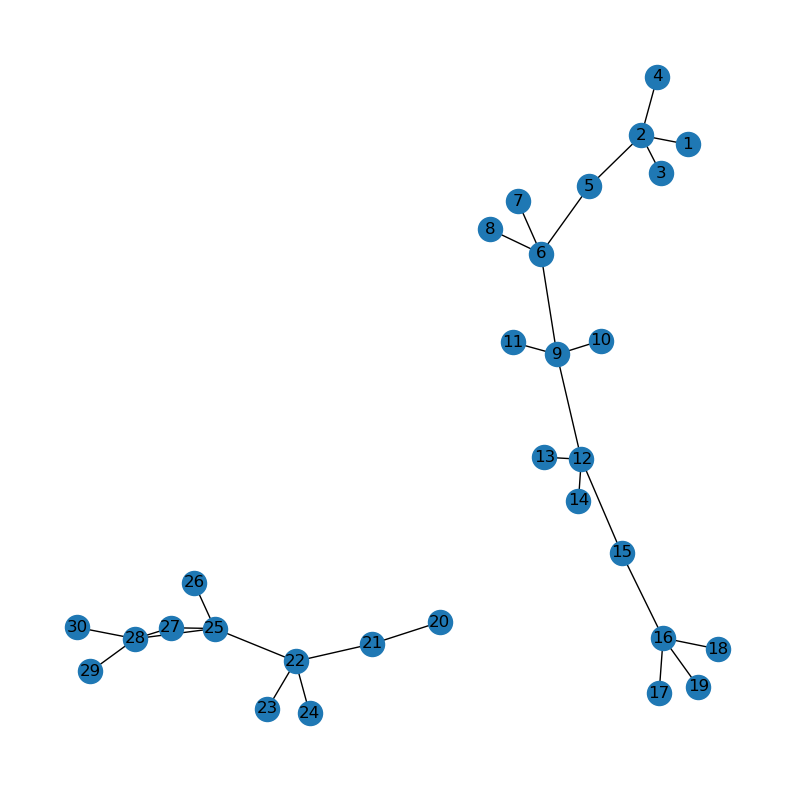

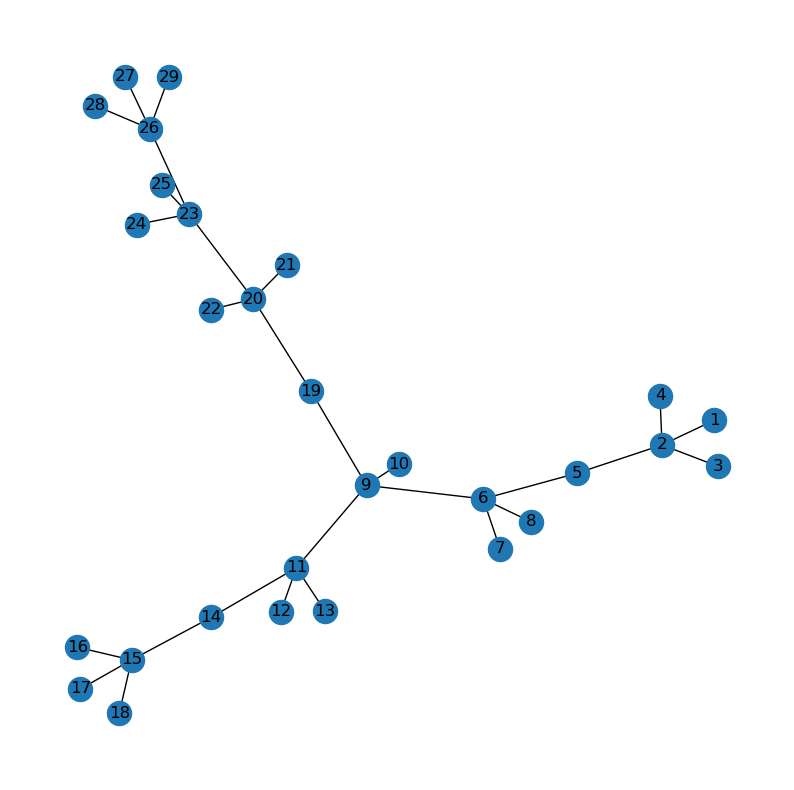

In [122]:
show_nodes(G_pre)
show_nodes(G_post)

In [123]:
########input########
create_bond_pair = [InitIDs_pre]+[[23,119]]
del_bond_pair = [(21,23)] + [(117,119)]
########input########

del_bond_pair = [ [pre_mol.old2newid[ind] for ind in l] for l in del_bond_pair]
create_bond_pair = [[pre_mol.old2newid[ind] for ind in l] for l in create_bond_pair]

G_pre_mod = G_pre.copy()

G_pre_mod.add_edges_from(create_bond_pair)
G_pre_mod.remove_edges_from(del_bond_pair)

GM = nx.isomorphism.GraphMatcher(G_pre_mod, G_post)


if GM.is_isomorphic():
    node_mapping = GM.mapping
  
    with open("semi.map", "w") as ofn:
        ofn.write("this map is created by SemiMapper\n\n")
        ofn.write(f"{G_pre.number_of_nodes()} equivalences\n")
        ofn.write(f"{len(EdgeIDs_pre)} edgeIDs\n\n")
        ofn.write("InitiatorIDs\n\n")
        ofn.write("\n".join([str(pre_mol.old2newid[ind]) for ind in InitIDs_pre]))
        ofn.write("\n\nEdgeIDs\n\n")
        ofn.write("\n".join([str(pre_mol.old2newid[ind]) for ind in EdgeIDs_pre]))
        ofn.write("\n\nEquivalences\n\n")
        ofn.write("\n".join([ "\t".join([str(k), str(v)]) for k,v  in node_mapping.items()]))

        
else:
    print("マッチングできないよ.設定を確かめて")



マッチングできないよ.設定を確かめて


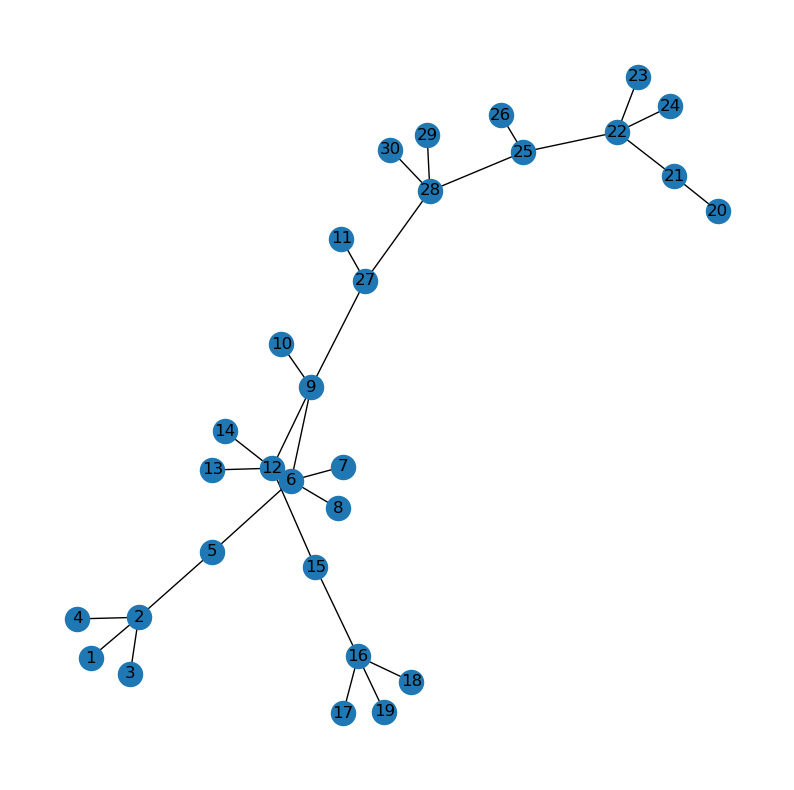

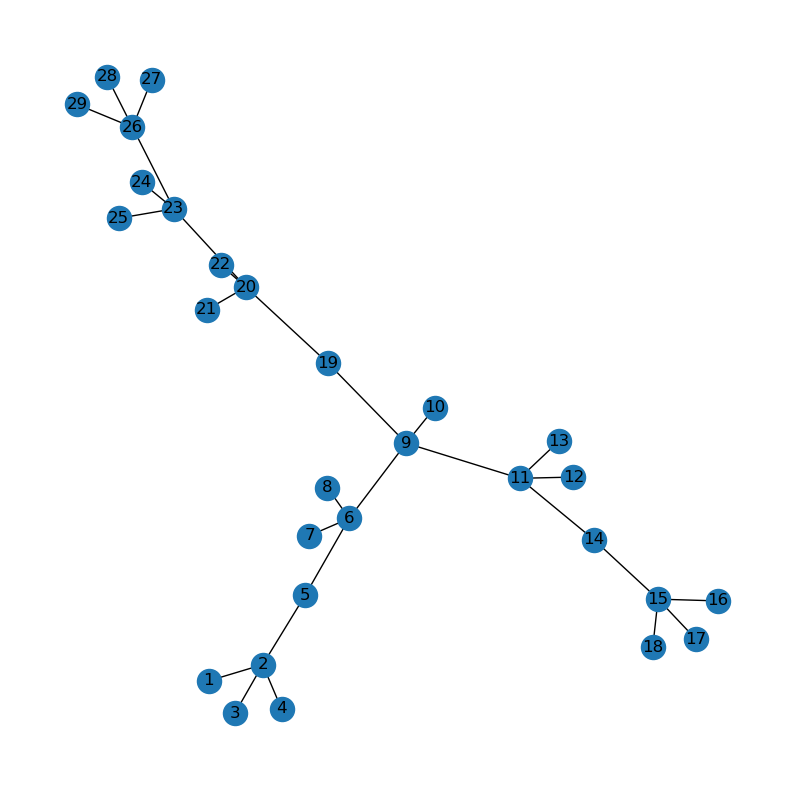

In [124]:
show_nodes(G_pre_mod )
show_nodes(G_post)

In [125]:
change_type_ids = []
for a,b in GM.mapping.items():
    pre_type = pre_mol.InitIDs[a]
    post_type = post_mol.InitIDs[b]
    if pre_type != post_type:
        change_type_ids.append(a)


newEdgeIDs_pre = [pre_mol.old2newid[a] for a in EdgeIDs_pre]

for s in change_type_ids:
    for t in newEdgeIDs_pre:
        dist =  nx.shortest_path_length(G_pre_mod, source=s, target=t)
        if dist < 3:
            print(dist, pre_mol.new2old[s] , pre_mol.new2old[t])
            

NameError: name 'EdgeIDs_pre' is not defined

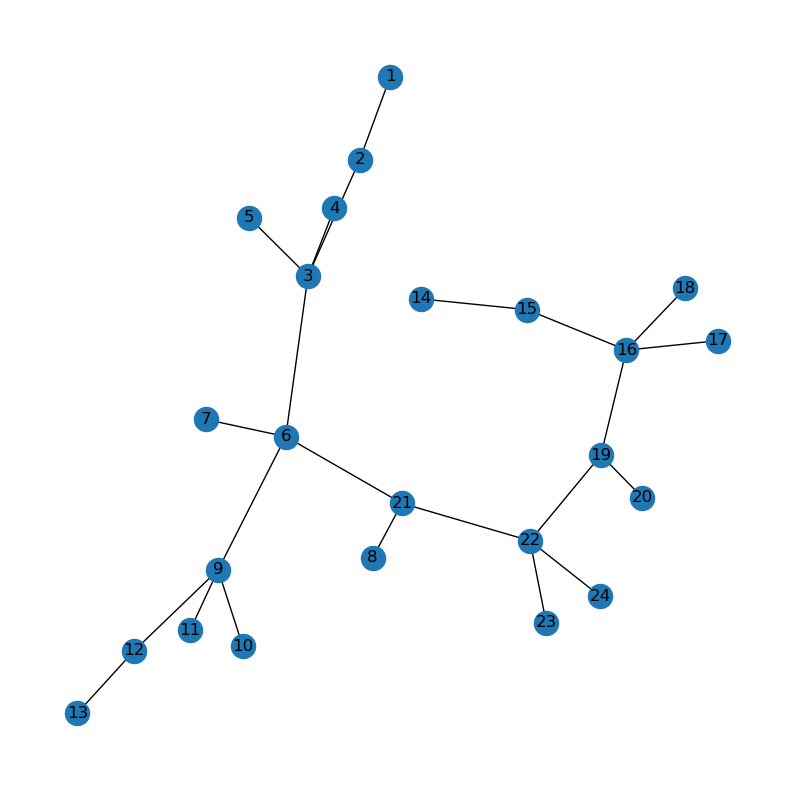

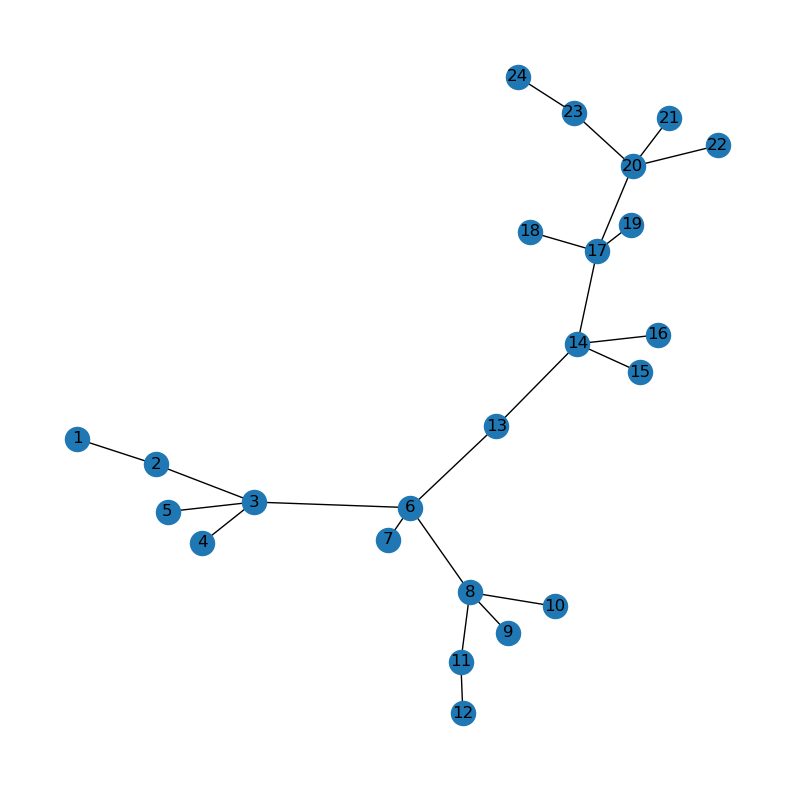

In [ ]:
show_nodes(G_pre_mod)
show_nodes(G_post)

with open("./cleaned_semi.map", 'w') as ofn:
    ofn.write("this map is created by cleaned-SemiMapper\n\n")
    ofn.write(f"{pre_mol.numAtom} equivalences\n{len(EdgeIDs)} edgeIDs\n\n")
    ofn.write("InitiatorIDs\n\n")
    ofn.write("\n".join([str(pre_mol.old2newid[id]) for id in InitIDs]))
    ofn.write("\n\nEdgeIDs\n\n")
    ofn.write("\n".join([str(pre_mol.old2newid[id]) for id in EdgeIDs]))
    ofn.write("\n\nEquivalences\n\n")
    ofn.write("\n".join( ["\t".join([str(ind), str(post_mol.old2newid[pre_post_map_bef[pre_mol.new2old[ind]]])]) for ind in range(1, pre_mol.numAtom+1)] ) )
    ofn.write("\n")
